In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('gdb9_G4MP2_withdata_hydrogenation_clean.csv')

# Display the first few rows of the dataframe to understand its structure
print(df.head())


  unsat_SMILE sat_SMILE     delta_H  nH2    pH2
0         C#C        CC  150.735206    2  13.42
1         C=O        CO   83.774454    1   6.29
2        CC#C       CCC  139.811813    2   9.15
3        CC=O       CCO   63.227291    1   4.38
4     CC(C)=O    CC(C)O   51.916637    1   3.36


In [9]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np 

import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np 


# Function to convert SMILES to Morgan fingerprints
def smiles_to_fingerprints(smiles_list):
    fingerprints = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
        arr = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp, arr)
        fingerprints.append(arr)
    return np.array(fingerprints)

# Example dataframe
# df = pd.read_csv('path_to_your_data.csv')
smiles_list = df['unsat_SMILE'].tolist()

# Convert SMILES to fingerprints
fingerprints = smiles_to_fingerprints(smiles_list)

# Standardize the features
scaler = StandardScaler()
fingerprints_standardized = scaler.fit_transform(fingerprints)

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(fingerprints_standardized)

# Create a dataframe with the principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])


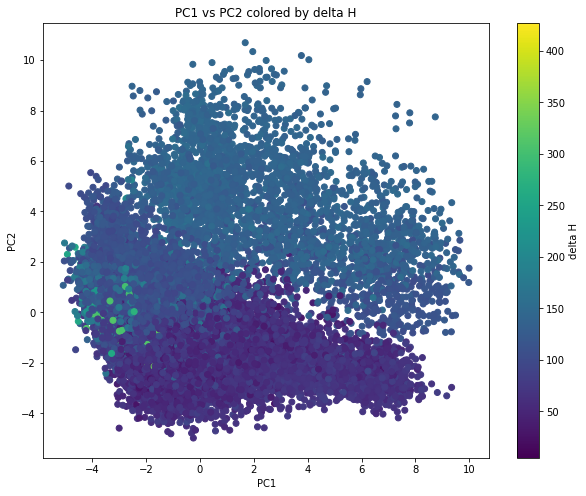

In [10]:
import matplotlib.pyplot as plt

# Append delta H values to the principal component dataframe
finalDf = pd.concat([principalDf, df['delta_H']], axis = 1)

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(finalDf['PC1'], finalDf['PC2'], c=finalDf['delta_H'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='delta H')
plt.title('PC1 vs PC2 colored by delta H')
plt.show()


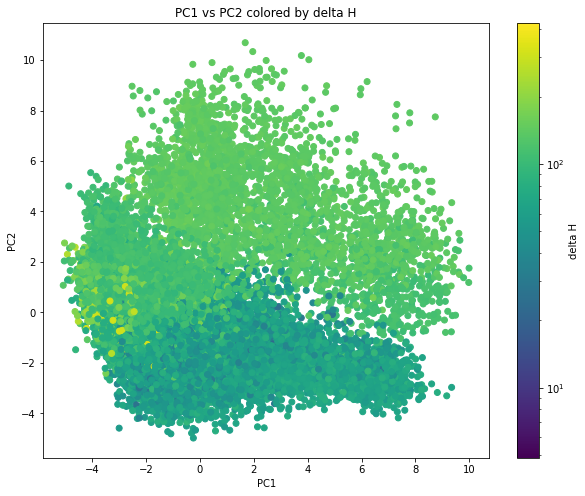

In [11]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

# Append delta H values to the principal component dataframe
finalDf = pd.concat([principalDf, df['delta_H']], axis = 1)

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(finalDf['PC1'], finalDf['PC2'], c=finalDf['delta_H'], cmap='viridis', norm=LogNorm())
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='delta H')
plt.title('PC1 vs PC2 colored by delta H')
plt.show()


In [15]:
# PCA with feature extraction functions


def evaluate_chem_mol(mol):
    mol_sssr = Chem.GetSSSR(mol)
    clogp    = Crippen.MolLogP(mol)
    mr       = Crippen.MolMR(mol)
    mw       = MolDescriptors.CalcExactMolWt(mol)
    tpsa    = MolDescriptors.CalcTPSA(mol)
    Chi0n    = MolDescriptors.CalcChi0n(mol)
    Chi1n    = MolDescriptors.CalcChi1n(mol)
    Chi2n    = MolDescriptors.CalcChi2n(mol)
    Chi3n    = MolDescriptors.CalcChi3n(mol)
    Chi4n    = MolDescriptors.CalcChi4n(mol)
    Chi0v    = MolDescriptors.CalcChi0v(mol)
    Chi1v    = MolDescriptors.CalcChi1v(mol)
    Chi2v    = MolDescriptors.CalcChi2v(mol)
    Chi3v    = MolDescriptors.CalcChi3v(mol)
    Chi4v    = MolDescriptors.CalcChi4v(mol)
    fracsp3  = MolDescriptors.CalcFractionCSP3(mol)
    Hall_Kier_Alpha = MolDescriptors.CalcHallKierAlpha(mol)
    Kappa1      = MolDescriptors.CalcKappa1(mol)
    Kappa2      = MolDescriptors.CalcKappa2(mol)
    Kappa3      = MolDescriptors.CalcKappa3(mol)
    LabuteASA   = MolDescriptors.CalcLabuteASA(mol)
    Number_Aliphatic_Rings = MolDescriptors.CalcNumAliphaticRings(mol)
    Number_Aromatic_Rings = MolDescriptors.CalcNumAromaticRings(mol)
    Number_Amide_Bonds = MolDescriptors.CalcNumAmideBonds(mol)
    Number_Atom_Stereocenters = MolDescriptors.CalcNumAtomStereoCenters(mol)
    Number_BridgeHead_Atoms = MolDescriptors.CalcNumBridgeheadAtoms(mol)
    Number_HBA = MolDescriptors.CalcNumHBA(mol)
    Number_HBD = MolDescriptors.CalcNumHBD(mol)
    Number_Hetero_Atoms = MolDescriptors.CalcNumHeteroatoms(mol)
    Number_Hetero_Cycles = MolDescriptors.CalcNumHeterocycles(mol)
    Number_Rings = MolDescriptors.CalcNumRings(mol)
    Number_Rotatable_Bonds = MolDescriptors.CalcNumRotatableBonds(mol)
    Number_Spiro = MolDescriptors.CalcNumSpiroAtoms(mol)
    Number_Saturated_Rings = MolDescriptors.CalcNumSaturatedRings(mol)
    Number_Heavy_Atoms = Lipinski.HeavyAtomCount(mol)
    Number_NH_OH = Lipinski.NHOHCount(mol)
    Number_N_O = Lipinski.NOCount(mol)
    Number_Valence_Electrons = Descriptors.NumValenceElectrons(mol)
    Max_Partial_Charge = Descriptors.MaxPartialCharge(mol)
    Min_Partial_Charge = Descriptors.MinPartialCharge(mol)

    return mol_sssr, clogp, mr, mw, tpsa, Chi0n, Chi1n, Chi2n, Chi3n, Chi4n, Chi0v, Chi1v, Chi2v, Chi3v, Chi4v, fracsp3, Hall_Kier_Alpha,Kappa1, Kappa2, Kappa3, LabuteASA, Number_Aliphatic_Rings, Number_Aromatic_Rings, Number_Amide_Bonds, Number_Atom_Stereocenters, Number_BridgeHead_Atoms, Number_HBA, Number_HBD, Number_Hetero_Atoms, Number_Hetero_Cycles, Number_Rings, Number_Rotatable_Bonds, Number_Spiro, Number_Saturated_Rings, Number_Heavy_Atoms, Number_NH_OH, Number_N_O, Number_Valence_Electrons, Max_Partial_Charge, Min_Partial_Charge



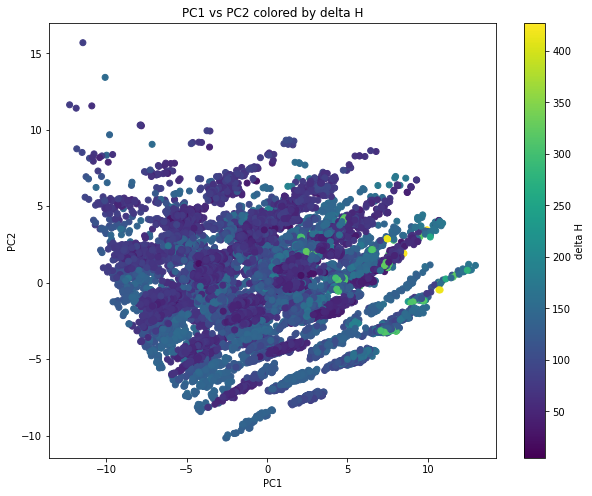

In [17]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Crippen, Lipinski, Descriptors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import rdkit.Chem.rdMolDescriptors as MolDescriptors


# Load the dataset
df = pd.read_csv('gdb9_G4MP2_withdata_hydrogenation_clean.csv')

# Convert SMILES to molecules and extract features
features = [evaluate_chem_mol(Chem.MolFromSmiles(smiles)) for smiles in df['unsat_SMILE']]
features_df = pd.DataFrame(features)

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features_df)

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_standardized)

# Create a dataframe with the principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

# Append delta H values to the principal component dataframe
finalDf = pd.concat([principalDf, df['delta_H']], axis = 1)

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(finalDf['PC1'], finalDf['PC2'], c=finalDf['delta_H'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='delta H')
plt.title('PC1 vs PC2 colored by delta H')
plt.show()
